In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

df = pd.read_csv("IMDB Dataset.csv")
data=df.sample(frac=0.1,replace=True,random_state=1)
data

,review,sentiment
33003,"Set in Paris in the year 1910, a retired old r...",positive
12172,"Basic structure of a story: Beginning, Middle,...",negative
5192,"An odd, willfully skewed biopic of Dyan Thomas...",negative
32511,"Okay, you have:<br /><br />Penelope Keith as M...",negative
43723,The larger-than-life figures of Wyatt Earp and...,positive
...,...,...
36805,"This musical is decidedly mixed, and none of t...",positive
46711,Nothing better than an android boasting 80's t...,positive
12374,David Aames is a rich good-looking guy who liv...,positive
35086,So boring you'll fall asleep after the 20 firs...,negative


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_ngram(sentiment, n):
    
    temp_df = data[data['sentiment'] == sentiment]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['review'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)



plot_ngram('positive', 2)


,index,frequency
0,br br,4996
1,of the,4140
2,in the,2577
3,the film,1456
4,and the,1431
5,to the,1332
6,this movie,1321
7,this film,1140
8,it is,1115
9,the movie,1082


In [3]:
plot_ngram('negative', 2)

,index,frequency
0,br br,5306
1,of the,3669
2,in the,2647
3,this movie,1727
4,to be,1370
5,the film,1360
6,the movie,1327
7,and the,1272
8,to the,1140
9,this film,1080


C:\Users\ROMILOS VLACHOS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


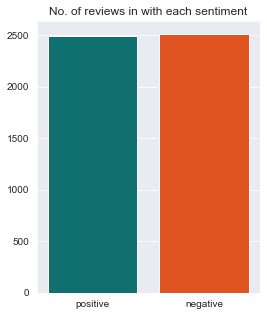

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(data['sentiment'], palette=['teal', 'orangered'])
plt.title('No. of reviews in with each sentiment')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [5]:
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

In [6]:
data['char count'] = data['review'].apply(lambda x : len(x))

In [7]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len (words)


data['average_word_length'] = data['review'].apply(lambda x : average_words(x))

In [8]:
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
len(stop_words)

[nltk_data] Downloading package stopwords to C:\Users\ROMILOS
[nltk_data]     VLACHOS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [9]:
data['stop_word_count'] = data['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [10]:
data['stop_word_rate'] = data['stop_word_count']/ data['word_count']

In [11]:
data.head()

,review,sentiment,word_count,char count,average_word_length,stop_word_count,stop_word_rate
33003,"Set in Paris in the year 1910, a retired old r...",positive,171,960,4.619883,66,0.385965
12172,"Basic structure of a story: Beginning, Middle,...",negative,319,1813,4.686520,132,0.413793
5192,"An odd, willfully skewed biopic of Dyan Thomas...",negative,188,1146,5.101064,76,0.404255
32511,"Okay, you have:<br /><br />Penelope Keith as M...",negative,557,3277,4.885099,220,0.394973
43723,The larger-than-life figures of Wyatt Earp and...,positive,393,2582,5.572519,150,0.381679


In [12]:
max_value = data["average_word_length"].max()
print(max_value)
print(data["average_word_length"].mean())

max_value = data["stop_word_count"].max()
print(max_value)
print(data["stop_word_count"].mean())

max_value = data["word_count"].max()
print(max_value)
print(data["word_count"].mean())

12.290909090909091
4.645814445208139
521
105.3638
1186
234.7596


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 33003 to 15561
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review               5000 non-null   object 
 1   sentiment            5000 non-null   object 
 2   word_count           5000 non-null   int64  
 3   char count           5000 non-null   int64  
 4   average_word_length  5000 non-null   float64
 5   stop_word_count      5000 non-null   int64  
 6   stop_word_rate       5000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 472.5+ KB


In [14]:
data.replace({'sentiment':{'positive':1,'negative':-1}},inplace=True)

In [15]:
data.describe()

,sentiment,word_count,char count,average_word_length,stop_word_count,stop_word_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,-0.004800,234.759600,1330.670200,4.645814,105.36380,0.449713
std,1.000088,174.456442,1007.330815,0.344750,78.66038,0.047934
min,-1.000000,8.000000,49.000000,3.333333,3.00000,0.175000
25%,-1.000000,126.000000,700.000000,4.435989,56.00000,0.420000
50%,-1.000000,176.000000,989.000000,4.637097,80.00000,0.450777
75%,1.000000,287.000000,1628.000000,4.842461,127.00000,0.480324
max,1.000000,1186.000000,7268.000000,12.290909,521.00000,0.638298


In [16]:
data["sentiment"].isna().sum()

0

In [17]:
data["review"].isna().sum()

0

In [18]:
data["sentiment"].value_counts()

-1    2512
 1    2488
Name: sentiment, dtype: int64

In [19]:
data["stop_word_count"].value_counts()

65     67
69     67
67     67
70     66
63     66
       ..
6       1
521     1
473     1
469     1
479     1
Name: stop_word_count, Length: 402, dtype: int64

In [20]:
data["word_count"].value_counts()

120    43
126    40
124    39
123    38
131    37
       ..
636     1
628     1
478     1
616     1
999     1
Name: word_count, Length: 721, dtype: int64

<BarContainer object of 402 artists>

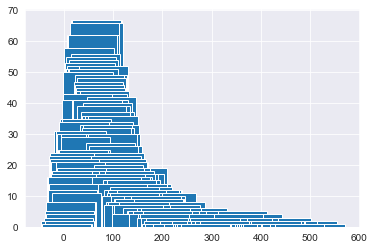

In [21]:
import matplotlib.pyplot as plt

plt.bar(x = data.stop_word_count.value_counts().index, height = data.stop_word_count.value_counts(), width = 100)

<BarContainer object of 721 artists>

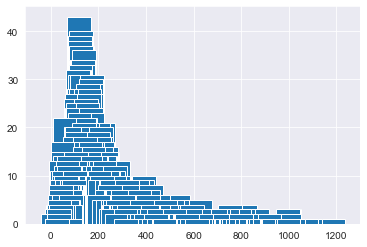

In [22]:
plt.bar(x = data.word_count.value_counts().index, height = data.word_count.value_counts(), width = 100)

In [23]:
data.groupby('sentiment').sum()

,word_count,char count,average_word_length,stop_word_count,stop_word_rate
sentiment,,,,,
-1,584098,3295623,11626.359695,263449,1133.585184
1,589700,3357728,11602.712531,263370,1114.978131


In [24]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(["br", "href"])

[nltk_data] Downloading package stopwords to C:\Users\ROMILOS
[nltk_data]     VLACHOS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from wordcloud import WordCloud, STOPWORDS
textt = " ".join(x for x in data.review)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

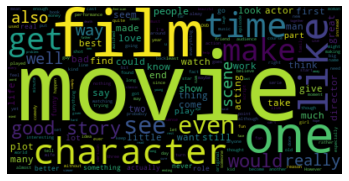

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud101.png')
plt.show()

In [27]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', "<", ">","/", ",", "'"))
    return final

data['review'] = data['review'].apply(remove_punctuation)

In [28]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

stopword_list=nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=False):
    tokenizer=ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

copied_data=data.copy()
#Apply function on review column
data['review'] = data['review'].apply(remove_stopwords)
    

In [29]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

data["review"] = get_stemmed_text(data["review"])

In [30]:
data

,review,sentiment,word_count,char count,average_word_length,stop_word_count,stop_word_rate
33003,set pari year 1910 retir old rich opera singer...,1,171,960,4.619883,66,0.385965
12172,basic structur stori begin middl endbr br some...,-1,319,1813,4.686520,132,0.413793
5192,odd will skew biopic dyan thoma hear littl doz...,-1,188,1146,5.101064,76,0.404255
32511,okay havebr br penelop keith miss herringbone-...,-1,557,3277,4.885099,220,0.394973
43723,larger-than-lif figur wyatt earp bat masterson...,1,393,2582,5.572519,150,0.381679
...,...,...,...,...,...,...,...
36805,music decidedli mix none element realli fit to...,1,151,868,4.754967,73,0.483444
46711,noth better android boast 80 technolog coming-...,1,136,713,4.250000,69,0.507353
12374,david aam rich good-look guy live new york cit...,1,312,1728,4.541667,146,0.467949
35086,bore youll fall asleep 20 first minut sorri Mr...,-1,108,636,4.898148,41,0.379630


In [31]:
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0,max_df=1,token_pattern=r'\b\w+\b',ngram_range=(1, 2))
train_matrix = vectorizer.fit_transform(train['review'])
test_matrix = vectorizer.transform(test['review'])

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
predictions

array([ 1, -1,  1, ..., -1,  1,  1], dtype=int64)

In [34]:
lr_report=classification_report(y_test,predictions)
print(lr_report)

              precision    recall  f1-score   support

          -1       0.82      0.46      0.59       573
           1       0.60      0.89      0.71       516

    accuracy                           0.66      1089
   macro avg       0.71      0.67      0.65      1089
weighted avg       0.71      0.66      0.65      1089



In [35]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,predictions)

print("ACCURACY:",score1)

ACCURACY: 0.6629935720844812


In [36]:
sentence = ["very good movie", "bad", "awful movie", "not good movie"]
sentence_pred = vectorizer.transform(sentence)
lr.predict(sentence_pred)

array([1, 1, 1, 1], dtype=int64)

In [37]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_bow=svm.fit(train_matrix,y_train)
print(svm_bow)

svm_bow_predict=svm.predict(test_matrix)
print(svm_bow_predict)

score2=accuracy_score(y_test,svm_bow_predict)
print("svm_bow_score :",score2)

svm_bow_report=classification_report(y_test,svm_bow_predict)
print(svm_bow_report)


SGDClassifier(max_iter=500, random_state=42)
[ 1 -1  1 ... -1  1  1]
svm_bow_score : 0.6299357208448118
              precision    recall  f1-score   support

          -1       0.84      0.37      0.51       573
           1       0.57      0.92      0.70       516

    accuracy                           0.63      1089
   macro avg       0.70      0.64      0.61      1089
weighted avg       0.71      0.63      0.60      1089



In [38]:
sentence = ["very good movie", "bad", "awful movie", "not good movie"]
sentence_pred = vectorizer.transform(sentence)
svm.predict(sentence_pred)

array([1, 1, 1, 1], dtype=int64)

In [39]:
from sklearn.naive_bayes import MultinomialNB
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(train_matrix,y_train)
print(mnb_bow)

mnb_bow_predict=mnb.predict(test_matrix)
print(mnb_bow_predict)

#Accuracy score for bag of words
score3=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",score3)

#Classification report for bag of words 
mnb_bow_report=classification_report(y_test,mnb_bow_predict)
print(mnb_bow_report)

cm_bow=confusion_matrix(y_test,mnb_bow_predict)
print(cm_bow)


MultinomialNB()
[ 1 -1  1 ... -1  1 -1]
mnb_bow_score : 0.721763085399449
              precision    recall  f1-score   support

          -1       0.73      0.75      0.74       573
           1       0.71      0.69      0.70       516

    accuracy                           0.72      1089
   macro avg       0.72      0.72      0.72      1089
weighted avg       0.72      0.72      0.72      1089

[[428 145]
 [158 358]]


In [40]:
sentence = ["very good movie", "bad", "awful movie", "not good movie"]
sentence_pred = vectorizer.transform(sentence)
mnb.predict(sentence_pred)

array([1, 1, 1, 1], dtype=int64)

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
#fitting the svm for bag of words
clf_bow=clf.fit(train_matrix,y_train)
print(clf_bow)
#fitting the svm for tfidf features

#Predicting the model for bag of words
clf_bow_predict=clf.predict(test_matrix)
print(clf_bow_predict)

#Accuracy score for bag of words
score4=accuracy_score(y_test,clf_bow_predict)
print("mnb_bow_score :",score4)

#Classification report for bag of words 
clf_bow_report=classification_report(y_test,clf_bow_predict)
print(clf_bow_report)

#confusion matrix for bag of words
clf_bow=confusion_matrix(y_test,clf_bow_predict)
print(clf_bow)


RandomForestClassifier()
[1 1 1 ... 1 1 1]
mnb_bow_score : 0.5500459136822773
              precision    recall  f1-score   support

          -1       0.88      0.17      0.28       573
           1       0.51      0.97      0.67       516

    accuracy                           0.55      1089
   macro avg       0.70      0.57      0.48      1089
weighted avg       0.71      0.55      0.47      1089

[[ 96 477]
 [ 13 503]]


In [42]:

sentence = ["very good movie", "bad", "awful movie", "not good movie"]
sentence_pred = vectorizer.transform(sentence)
clf.predict(sentence_pred)

array([1, 1, 1, 1], dtype=int64)

LSTM MODEL


In [43]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
# to load, access, process and dump json files
import json
# regular repression
import re
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences


data = pd.read_csv("IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [44]:
df = data.sample(frac=0.1, replace=True, random_state=1)

df['word_count'] = df['review'].apply(lambda x: len(x.split()))
df['char count'] = df['review'].apply(lambda x : len(x))

vocab_size = df["word_count"].sum()
print(vocab_size)
print(df["sentiment"].value_counts())


1173798
negative    2512
positive    2488
Name: sentiment, dtype: int64


In [45]:
reviews = np.array([review for review in df['review']])
labels = np.array([label for label in df['sentiment']])


In [46]:

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)

print(enc.classes_)
print(labels[:5])
print(encoded_labels[:5])

['negative' 'positive']
['positive' 'negative' 'negative' 'negative' 'positive']
[1 0 0 0 1]


In [47]:
# Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

# specific stopwords
specific_sw = ['br', 'movie', 'film']

# all stopwords
stopwords = stopwords + specific_sw


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

df['review'] = df['review'].apply(remove_stopwords)



In [48]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, encoded_labels, test_size=0.33, stratify=labels)

In [49]:
oov_tok = "<OOV>"
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [50]:
# model initialization
from keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          117379800 
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 117,467,401
Trainable params: 117,467,401
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)

Epoch 1/5
71/71 - 400s - loss: 0.4855 - accuracy: 0.7892 - val_loss: 0.4095 - val_accuracy: 0.8165
Epoch 2/5
71/71 - 415s - loss: 0.1478 - accuracy: 0.9496 - val_loss: 0.4567 - val_accuracy: 0.8300
Epoch 3/5
71/71 - 336s - loss: 0.1142 - accuracy: 0.9706 - val_loss: 0.4570 - val_accuracy: 0.8336
Epoch 4/5
71/71 - 326s - loss: 0.0335 - accuracy: 0.9929 - val_loss: 0.6352 - val_accuracy: 0.8210
Epoch 5/5
71/71 - 323s - loss: 0.0191 - accuracy: 0.9964 - val_loss: 0.6401 - val_accuracy: 0.8237


In [53]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

[[0.991148  ]
 [0.00291717]]


In [54]:
pred = (pred > 0.5).astype(int)
score5 = accuracy_score(pred, validation_labels)
score5

0.8018181818181818

In [55]:
scores = [score1,score2,score3,score4, score5]

No handles with labels found to put in legend.


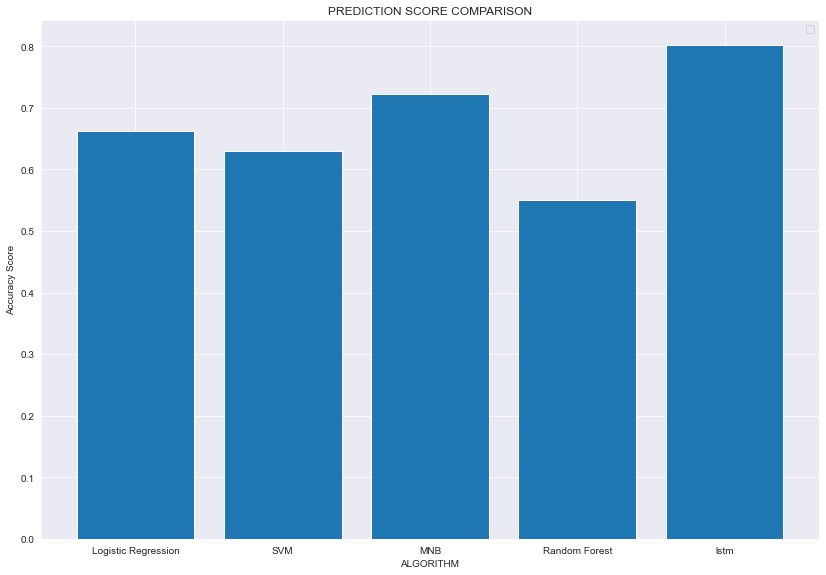

In [56]:
#Συγκριτικό διάγραμμα μεταξύ των score τις κάθε μεθόδου ανάλογα με τη μέθοδο παλινδρόμισης που εφαρμόστηκε.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
algorithms = ['Logistic Regression', 'SVM','MNB', 'Random Forest','lstm']
total_scores= scores
ax.bar(algorithms,total_scores)
plt.title('PREDICTION SCORE COMPARISON')
plt.legend()
plt.xlabel("ALGORITHM")
plt.ylabel("Accuracy Score")
plt.show()

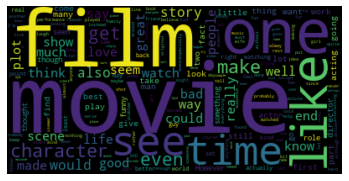

In [57]:
textt = " ".join(x for x in data.review)
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.show()

In [4]:
from tkinter import *
from PIL import ImageTk, Image
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt

In [6]:
root = Tk()
root.title('Sentiment Analysis')

e = Entry(root, width = 50)
e.grid(row = 0, column = 0, padx = 10, pady = 10, columnspan = 2)
e.insert(0, "")


def myClick_LR():
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    btn = Button(top, text='Click for accuracy score', command = graph)
    my_img = ImageTk.PhotoImage(Image.open("logistic.png"))
    my_label = Label(top, image = my_img)
    my_label2 = Label(top, text = "Accuracy is 69%")
    my_label3 = Label(top, text = "Scores of Logistic Regression")
    my_label.pack()
    my_label2.pack()
    my_label3.pack()
    btn.pack()
    
def myClick_SVM():
    
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    btn = Button(top, text='Click for accuracy score', command = graph)
    my_img = ImageTk.PhotoImage(Image.open("sgd.png"))
    my_label = Label(top, image = my_img)
    my_label2 = Label(top, text = "Accuracy is 69%")
    my_label3 = Label(top, text = "Scores of SVM")
    my_label.pack()
    my_label2.pack()
    my_label3.pack()
    btn.pack() 

def myClick_NB():
    
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    btn = Button(top, text='Click for accuracy score', command = graph)
    my_img = ImageTk.PhotoImage(Image.open("mnb.png"))
    my_label = Label(top, image = my_img)
    my_label2 = Label(top, text = "Accuracy is 69%")
    my_label3 = Label(top, text = "Scores of Naive Bayes Algorithm")
    my_label.pack()
    my_label2.pack()
    my_label3.pack()
    btn.pack() 
    

def myClick_RF():
    
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    btn = Button(top, text='Click for accuracy score', command = graph)
    my_img = ImageTk.PhotoImage(Image.open("random forest.png"))
    my_label = Label(top, image = my_img)
    my_label2 = Label(top, text = "Accuracy is 65%")
    my_label3 = Label(top, text = "Scores of Random Forest Algorithm")
    my_label.pack()
    my_label2.pack()
    my_label3.pack()
    btn.pack()
    
def myClick_LSTM():
    
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    btn = Button(top, text='Click for accuracy score', command = graph)
    my_img = ImageTk.PhotoImage(Image.open("lstm summary1.png"))
    my_label = Label(top, image = my_img)
    my_label2 = Label(top, text = "Accuracy is 79%")
    my_label3 = Label(top, text = "Scores of LSTM")
    my_label.pack()
    my_label2.pack()
    my_label3.pack()
    btn.pack()
    
def myClick_Prediction():
    
    global my_img
    
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of your review")
    str = e.get()
    
    sentence = []
    
    sentence.insert(0, str)
    
    # convert to a sequence
    sequences = tokenizer.texts_to_sequences(sentence)

    # pad the sequence
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    res = model.predict(padded)
    
    my_label2 = Label(top, text = "Prediction is: ")
    my_label2.pack()
    btn.pack()

    
def graph():
    global my_img
    top = Toplevel(root)
    top.geometry('500x300')
    top.title("Results of sentiment anlalysis")
    my_img = ImageTk.PhotoImage(Image.open("accuracy.png"))
    my_label = Label(top, image = my_img)
    my_label.pack()
    
    

def Close():
    root.destroy()    

SVMButton = Button(root, text = "SVM", command = myClick_SVM, padx = 10, pady =10, width = 20)
LRButton = Button(root, text = "Logistic Regression", command = myClick_LR, padx = 10, pady =10, width = 20)
MNBButton = Button(root, text = "Multinomial Naive Bayes", command = myClick_NB, padx = 10, pady =10, width = 20)
RFButton = Button(root, text = "Random Forest", command = myClick_RF, padx = 10, pady =10, width = 20)
LSTMButton = Button(root, text = "LSTM", command = myClick_LSTM, padx = 10, pady =10, width = 20)
PREDICTIONButton = Button(root, text = "Prediction of your sentence", command = myClick_Prediction, padx = 10, pady =10, width = 20)
Button_quit = Button(root, text = "Exit Program", command = Close,  padx = 10, pady =10, width = 20)


SVMButton.grid(row = 1, column = 0)
LRButton.grid(row = 2, column = 0)
MNBButton.grid(row = 3, column = 0)
RFButton.grid(row = 4, column = 0)
LSTMButton.grid(row = 5, column = 0)
PREDICTIONButton.grid(row = 6, column = 0)
Button_quit.grid(row = 7, column = 0)


#root.resizable(True, True)
root.mainloop()